In [1]:
# Main Analysis.

In [2]:
import import_ipynb

from Core import (columns_with_empty_data, read_all_data, correlation_heatmap,plot_most_correlated,
plot_regplot, count_plot, plot_stack, plot_log, plot_monthly_sales_year_distibution, model_results, 
plot_residuals, replace_column_values, replace_na_with_none, replace_column_values, replace_na_with_zero,
replace_na_with_mode, replace_categorical_values, caluclate_cumsum, plot_pca, plot_pca_variance)
#################################################################
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import ElasticNet,Lasso, LinearRegression, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC, SVR
#################################################################
import xgboost as xgb
import lightgbm as lgb
from mlxtend.regressor import StackingRegressor
import matplotlib.pyplot as plt

importing Jupyter notebook from Core.ipynb


In [3]:
# Load Data
%store -r train_data
%store -r test_data
%store -r all_data

In [4]:
all_data.shape

(2919, 81)

In [5]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
train_data.iloc[:,[1,3,19,46,77,8,80]].describe()

MSSubClass  LotFrontage    YearBuilt    GrLivArea       YrSold  \
count  1460.000000  1201.000000  1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958  1971.267808  1515.463699  2007.815753   
std      42.300571    24.284752    30.202904   525.480383     1.328095   
min      20.000000    21.000000  1872.000000   334.000000  2006.000000   
25%      20.000000    59.000000  1954.000000  1129.500000  2007.000000   
50%      50.000000    69.000000  1973.000000  1464.000000  2008.000000   
75%      70.000000    80.000000  2000.000000  1776.750000  2009.000000   
max     190.000000   313.000000  2010.000000  5642.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000

In [7]:
columns_with_empty_data(train_data)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

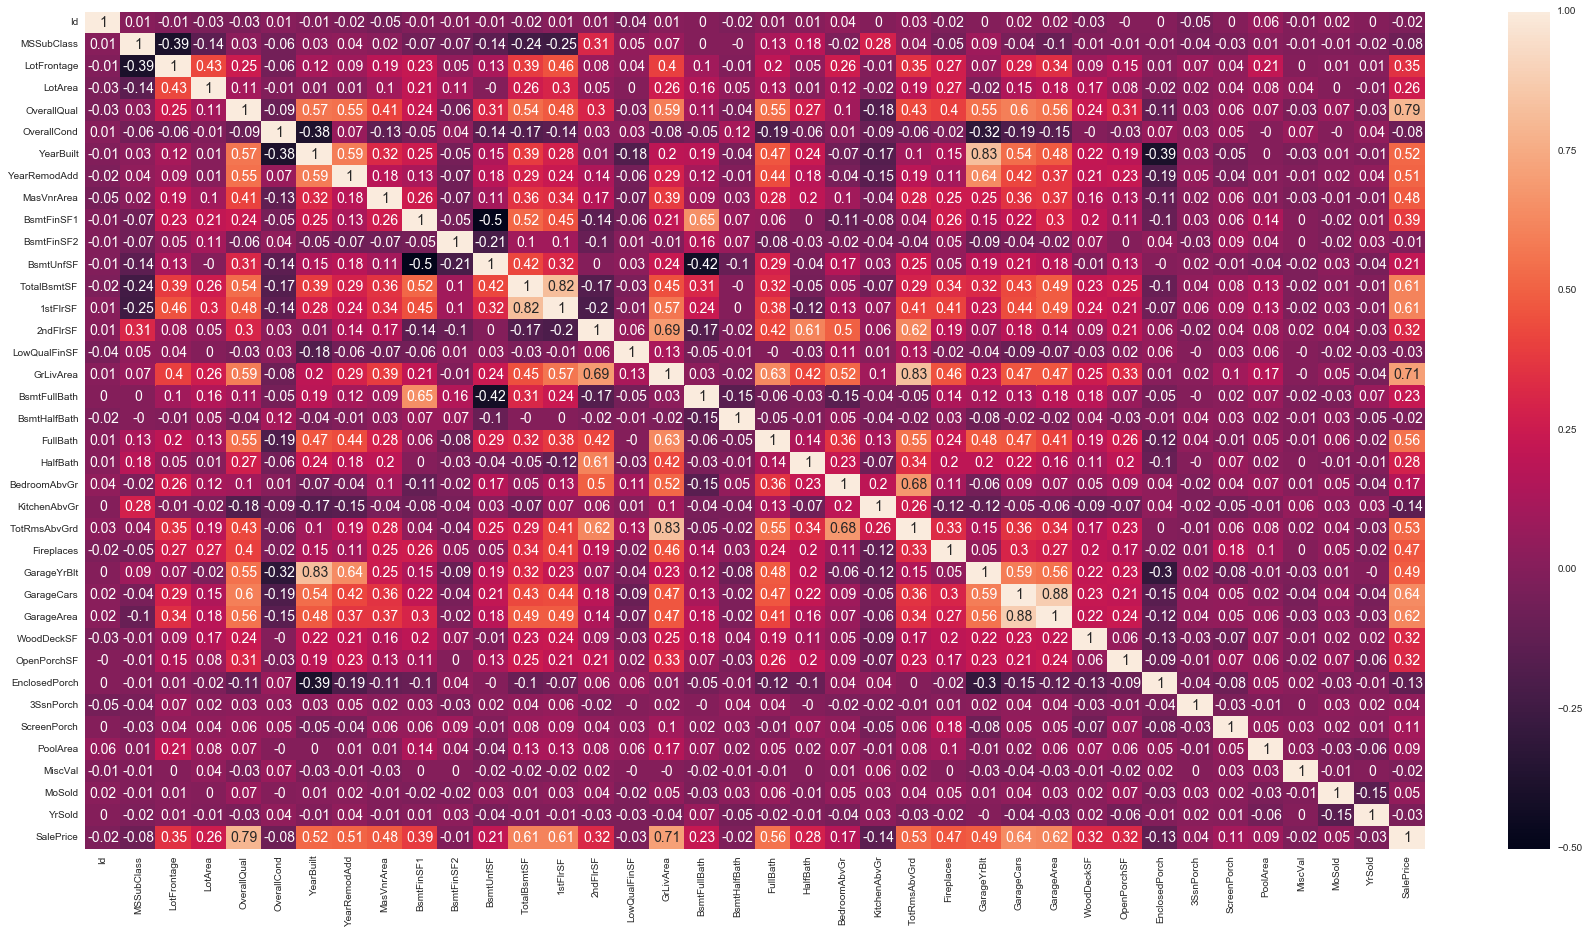

In [8]:
correlation_heatmap(train_data)

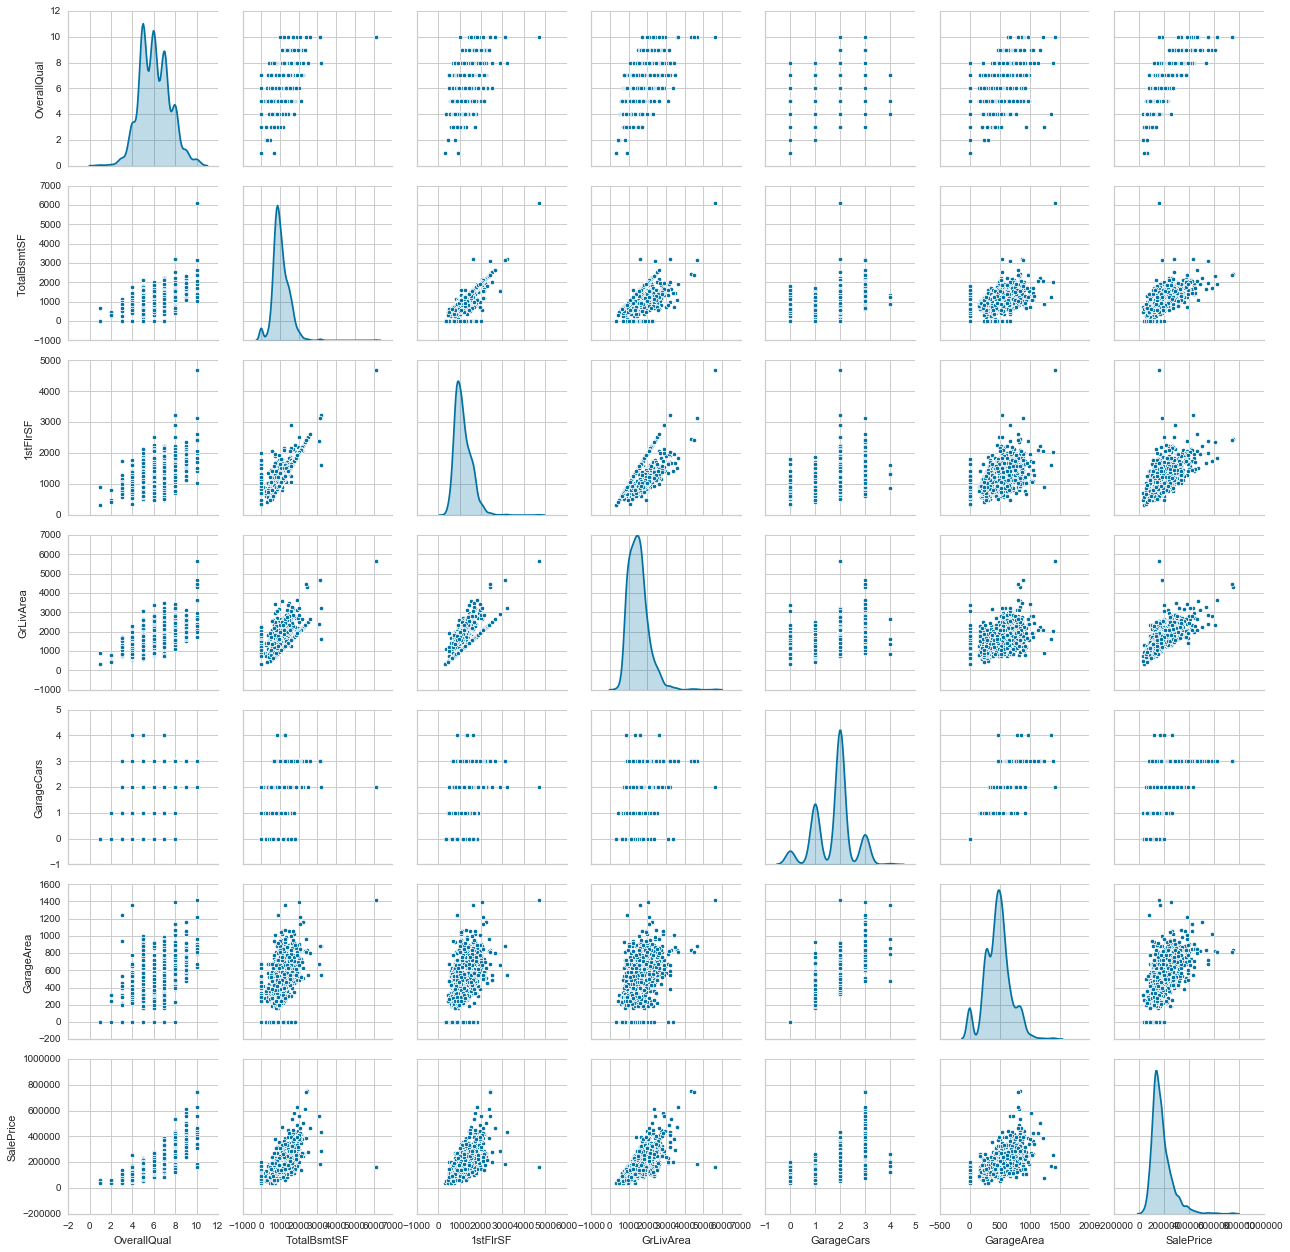

In [9]:
plot_most_correlated(train_data)

In [10]:
# Data Processing

In [11]:
# Remove outliers

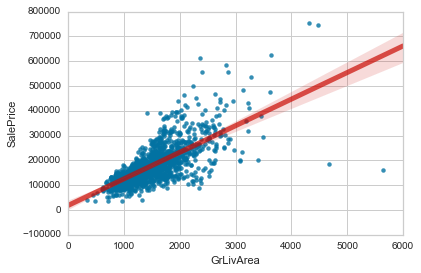

In [12]:
plot_regplot(train_data, "GrLivArea", "SalePrice")

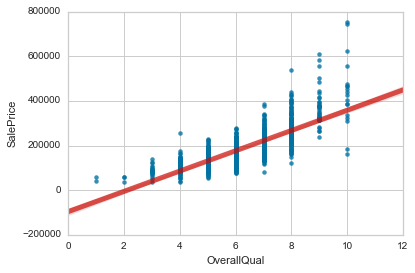

In [13]:
plot_regplot(train_data, "OverallQual","SalePrice")

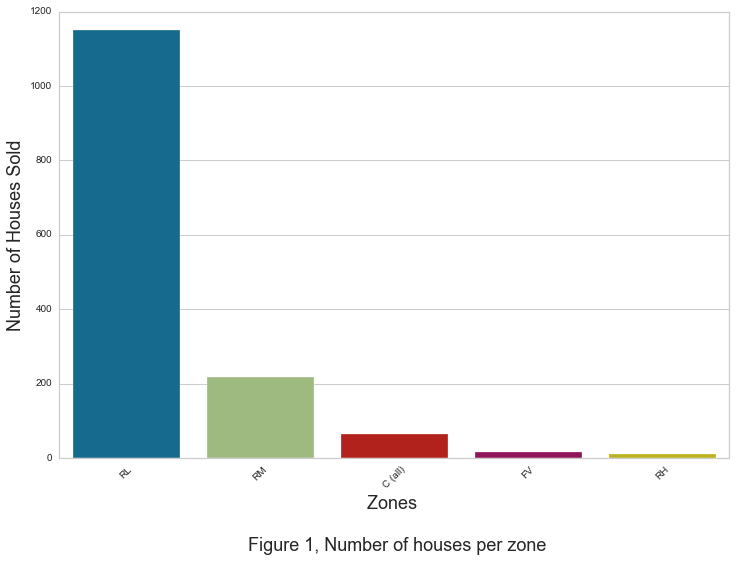

In [14]:
count_plot(train_data, 'MSZoning', '', "Zones \n\n Figure 1, Number of houses per zone", 'Number of Houses Sold')

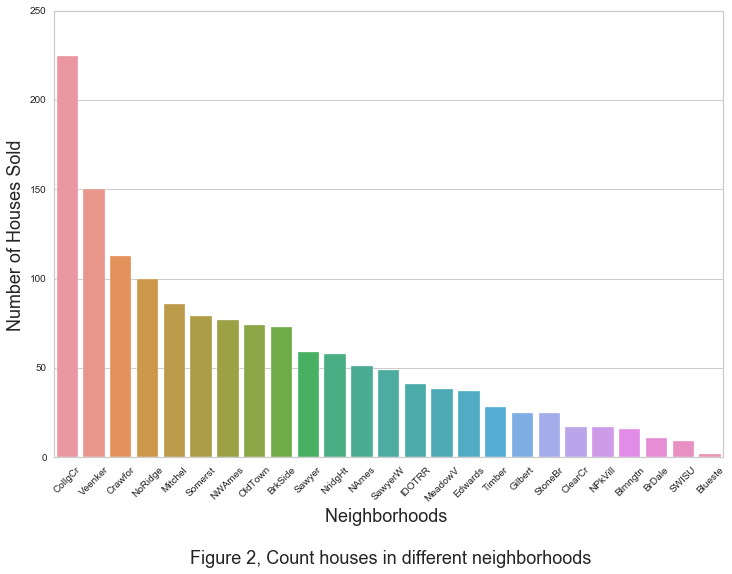

In [15]:
count_plot(train_data, 'Neighborhood', '','Neighborhoods \n\n Figure 2, Count houses in different neighborhoods', 
           'Number of Houses Sold')

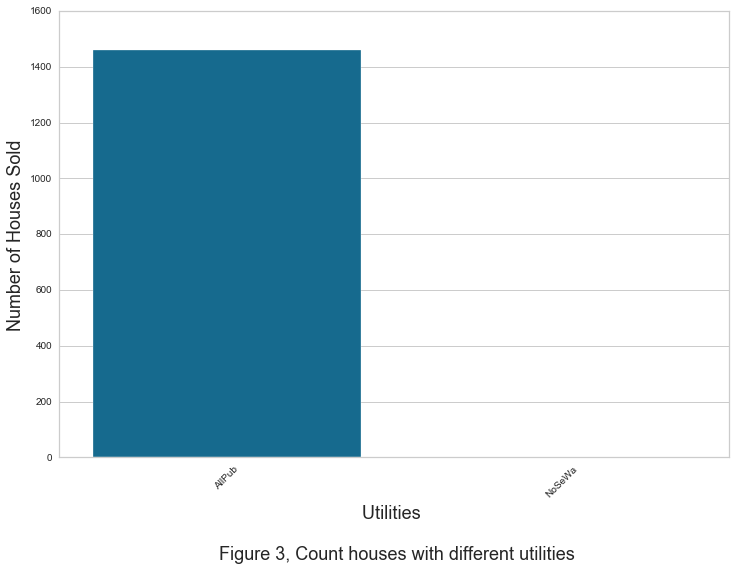

In [16]:
count_plot(train_data, 'Utilities', '', 'Utilities \n\n Figure 3, Count houses with different utilities', 'Number of Houses Sold')

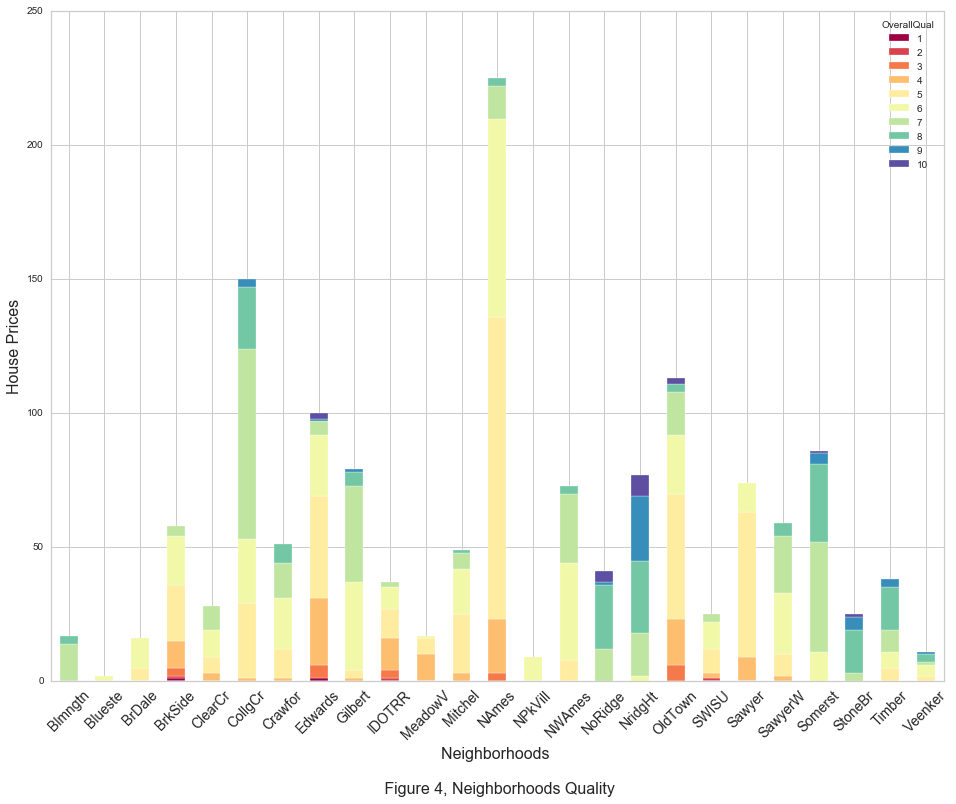

In [17]:
plot_stack(train_data, ['Neighborhood', 'OverallQual'], title='', x_label='Neighborhoods \n\n Figure 4, Neighborhoods Quality', 
           y_label='House Prices')

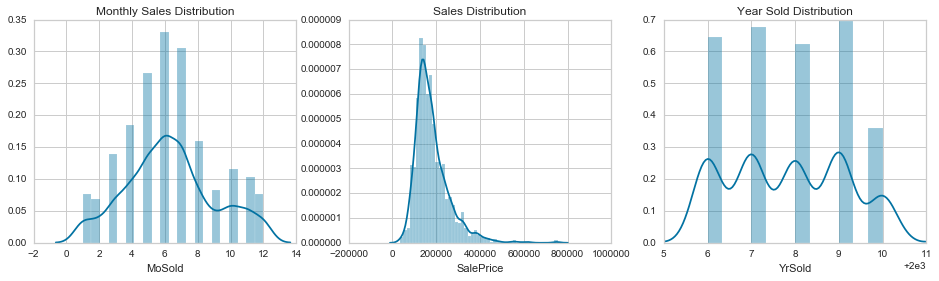

In [18]:
plot_monthly_sales_year_distibution(train_data)

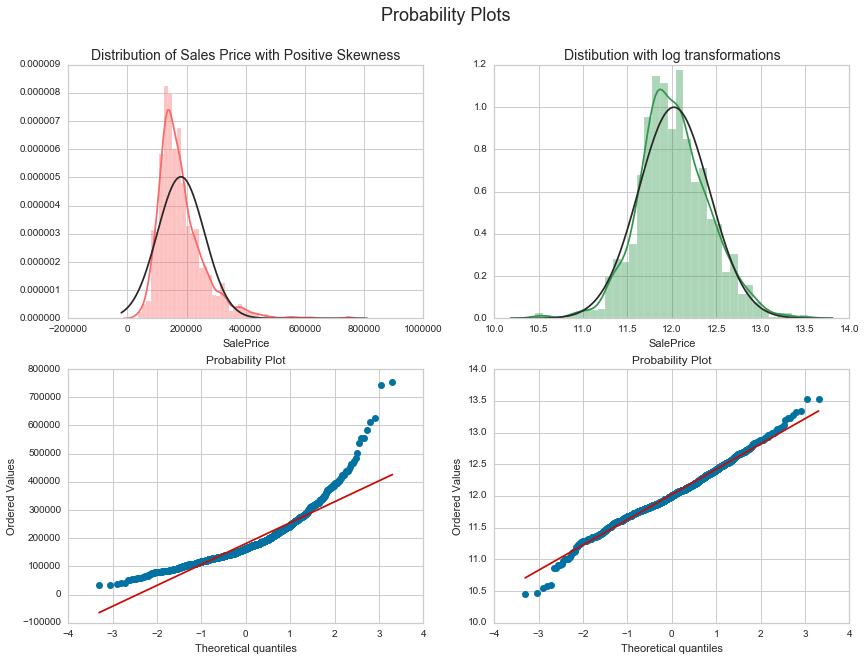

In [19]:
plot_log(train_data, 'SalePrice', 'Distribution of Sales Price with Positive Skewness')

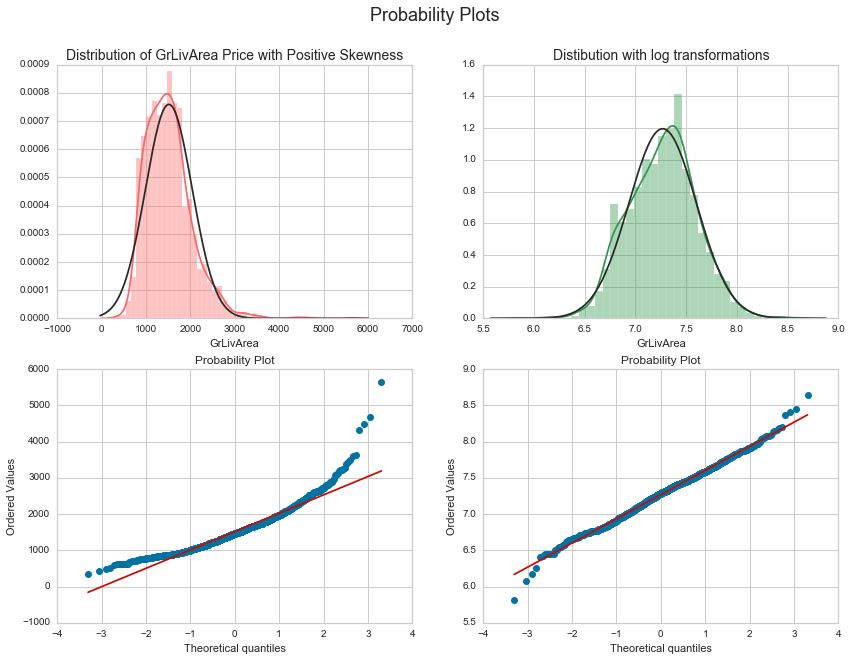

In [20]:
plot_log(train_data, 'GrLivArea', 'Distribution of GrLivArea Price with Positive Skewness')

In [21]:
# Feature Transformation/Engineering

In [22]:
# Columns where NaN values have the meaning e.g. no pool etc.
columns_with_meaningful_na = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2']

replace_na_with_none(all_data, columns_with_meaningful_na)

In [23]:
all_data.loc[all_data.GarageYrBlt.isnull(),'GarageYrBlt'] = all_data.loc[all_data.GarageYrBlt.isnull(),'YearBuilt']

In [24]:
# All columns where missing values can be replaced with 0
columns_replace_with_zero = ['GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 
            'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']

replace_na_with_zero(all_data, columns_replace_with_zero)

In [25]:
# All columns where missing values can be replaced with the mode (most frequently occurring value)
columns_replace_with_mode = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 
            'Functional', 'Utilities']

replace_na_with_mode(all_data, columns_replace_with_mode)

In [26]:
LotFrontage_mean = all_data['LotFrontage'].mean()
all_data.loc[all_data.LotFrontage.isnull(),'LotFrontage'] = LotFrontage_mean

In [27]:
# Remaining Nan values
cols_with_na = all_data.drop('SalePrice',axis=1).isnull().sum()
cols_with_na = cols_with_na[cols_with_na>0]
rows_with_na = all_data.drop('SalePrice',axis=1).isnull().sum(axis=1)
rows_with_na = rows_with_na[rows_with_na>0]

# fill remaining nans with mode in that column
for col in cols_with_na.index:
    all_data[col].fillna(all_data[col].mode()[0], inplace=True)

In [28]:
replace_column_values(all_data, ["BsmtCond", "GarageQual", "GarageCond", "KitchenQual", 
                       "FireplaceQu", "BsmtQual", "ExterCond", "ExterQual", "PoolQC"], 
                      {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})

replace_column_values(all_data, ["Heating", "HeatingQC"], {"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})

replace_column_values(all_data, ["BsmtExposure"],{"None":0, "No":1, "Mn":2, "Av":3, "Gd":4})

replace_column_values(all_data, ["BsmtFinType1", "BsmtFinType2"], {"None":0, "Unf":1, "LwQ":2, "Rec":3,
                                                                   "BLQ":4, "ALQ":5, "GLQ":6})

replace_column_values(all_data, ["CentralAir"], {"N":0, "Y":1})

replace_column_values(all_data, ["Fence"], {"None":0, "MnWw":1, "GdWo":2, "MnPrv":3, "GdPrv":4})

replace_column_values(all_data, ["Functional"], {"Sal":0, "Sev":1, "Maj2":2, "Maj1":3, "Mod":4, "Min2":5,
                                                 "Min1":6, "Typ":7})

replace_column_values(all_data, ["GarageFinish"], {"None":0, "Unf":1, "RFn":2, "Fin":3})

replace_column_values(all_data, ["GarageType"], {"None":0, "Detchd":1, "CarPort":2, "BuiltIn":3, "Basment":4,
                                                 "Attchd":5, "2Types":6})
    
replace_column_values(all_data, ["Utilities"], {"ELO":0, "NoSeWa":1, "NoSewr":2, "AllPub":3})

replace_column_values(all_data, ["PavedDrive"], {"N":0, "P":1, "Y":2})

In [29]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [30]:
categorical_values = ['Alley', 'BldgType', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 
                            'Exterior2nd', 'Foundation', 'Heating', 'HouseStyle', 'LotConfig', 'LotShape', 
                            'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'RoofMatl', 'RoofStyle', 
                            'SaleCondition', 'SaleType', 'Street', 'LandSlope', 'PavedDrive', 'LandContour']

replace_categorical_values(all_data, categorical_values)

In [31]:
train_data = all_data[all_data['SalePrice']>0]
test_data = all_data[all_data['SalePrice'].isna()]

X = preprocessing.normalize(train_data, norm='l1')
X = pd.DataFrame(X, columns = train_data.columns)
X = X.drop('SalePrice', axis=1)

y = np.log(train_data['SalePrice'] )

In [32]:
test_data.head()

1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BldgType  BsmtCond  \
0       896         0          0      0             2         1         3   
1      1329         0          0      0             3         1         3   
2       928       701          0      0             3         1         3   
3       926       678          0      0             3         1         3   
4      1280         0          0      0             2         3         3   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2   ...    SaleType  ScreenPorch  \
0             1       468.0       144.0   ...           4          120   
1             1       923.0         0.0   ...           4            0   
2             1       791.0         0.0   ...           4            0   
3             1       602.0         0.0   ...           4            0   
4             1       263.0         0.0   ...           4          144   

   Street  TotRmsAbvGrd  TotalBsmtSF  Utilities  WoodDeckSF  YearBuilt  \
0       0             5        882.0          3         140       1961   
1       0             6       1329.0          3         393       1958   
2       0             6        928.0          3         212       1997   
3       0             7        926.0          3         360       1998   
4       0             5       1280.0          3           0       1992   

   YearRemodAdd  YrSold  
0          1961    2010  
1          1958    2010  
2          1998    2010  
3          1998    2010  
4          1992    2010  

[5 rows x 81 columns]

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [34]:
# PCA

In [35]:
caluclate_cumsum(X)

array([0.88878333, 0.95869064, 0.96768423, 0.97606568, 0.98344372,
       0.98966039, 0.99443764, 0.99639359, 0.99746313, 0.99843025,
       0.99897205, 0.99935245, 0.99951579, 0.99966147, 0.99979185,
       0.99986068, 0.99992159, 0.99994588, 0.9999653 , 0.99997686,
       0.99998655, 0.99999203, 0.99999626, 0.99999738, 0.99999849,
       0.99999876, 0.99999895, 0.99999907, 0.99999917, 0.99999925,
       0.99999931, 0.99999937, 0.99999943, 0.99999947, 0.99999951,
       0.99999955, 0.99999959, 0.99999962, 0.99999965, 0.99999968,
       0.99999971, 0.99999973, 0.99999975, 0.99999978, 0.99999979,
       0.99999981, 0.99999983, 0.99999985, 0.99999986, 0.99999988,
       0.99999989, 0.9999999 , 0.99999991, 0.99999992, 0.99999992,
       0.99999993, 0.99999994, 0.99999995, 0.99999995, 0.99999996,
       0.99999996, 0.99999997, 0.99999997, 0.99999998, 0.99999998,
       0.99999998, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 1.        , 1.        , 1.        , 1.     

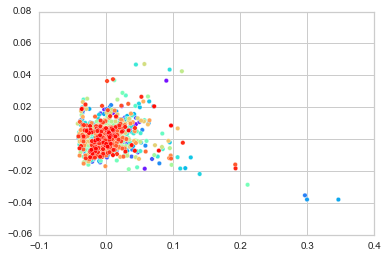

In [36]:
plot_pca(X, y)

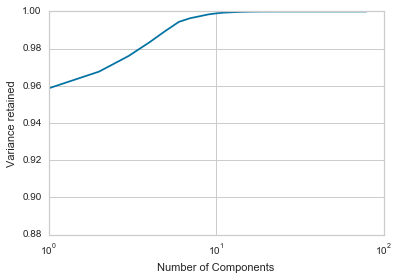

In [37]:
plot_pca_variance(X)

In [38]:
# Models

In [39]:
parameters = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}

model_results(LinearRegression(), parameters, X_train, y_train, X_valid, y_valid)

Best Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
 Best Score: 0.3306112561674864
 RMSE Score: 0.08823454468741557
 Cross Validation Score: 0.2790652281139343


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 0.3306112561674864,
 0.08823454468741557,
 0.2790652281139343)

In [40]:
parameters = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], 
              "solver" : ["auto"]}

model_results(Ridge(), parameters, X_train, y_train, X_valid, y_valid)

Best Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)
 Best Score: 0.9453466386942786
 RMSE Score: 0.09117885166684206
 Cross Validation Score: 0.945549677678083


(Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=True, random_state=None, solver='auto', tol=0.001),
 0.9453466386942786,
 0.09117885166684206,
 0.945549677678083)

In [41]:
parameters = {"criterion" : ["mse", "friedman_mse", "mae"], "splitter" : ["best", "random"], 
              "min_samples_split" : [2, 3, 5, 10], "max_features" : ["auto", "log2"]}

model_results(DecisionTreeRegressor(), parameters, X_train, y_train, X_valid, y_valid)

Best Model: DecisionTreeRegressor(criterion='mae', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
 Best Score: 0.9899986779939665
 RMSE Score: 0.02895074466897228
 Cross Validation Score: 0.9888662753174859


(DecisionTreeRegressor(criterion='mae', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 0.9899986779939665,
 0.02895074466897228,
 0.9888662753174859)

In [42]:
parameters = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2"]}

model_results(RandomForestRegressor(), parameters, X_train, y_train, X_valid, y_valid)

Best Model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
 Best Score: 0.9922005122703764
 RMSE Score: 0.030206436105485235
 Cross Validation Score: 0.9927672230855272


(RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
 0.9922005122703764,
 0.030206436105485235,
 0.9927672230855272)

In [43]:
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=3, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=4000, learning_rate=0.05,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=20, min_samples_split=10, 
                                   loss='huber', random_state =3)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=7, 
                             min_child_weight=1.5, n_estimators=6000,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=32, silent=1,
                             random_state =8)

svr = SVR(C=1, kernel='linear')

In [44]:
parameters = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}

model_results(ENet, parameters, X_train, y_train, X_valid, y_valid)

Best Model: ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=3, selection='cyclic', tol=0.0001, warm_start=False)
 Best Score: 0.9458961288917601
 RMSE Score: 0.08957930463922613
 Cross Validation Score: 0.9460081263340413


(ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
       max_iter=1000, normalize=True, positive=False, precompute=False,
       random_state=3, selection='cyclic', tol=0.0001, warm_start=False),
 0.9458961288917601,
 0.08957930463922613,
 0.9460081263340413)

In [45]:
model_results(KRR, {}, X_train, y_train, X_valid, y_valid)

Best Model: KernelRidge(alpha=0.6, coef0=2.5, degree=3, gamma=None, kernel='polynomial',
      kernel_params=None)
 Best Score: 0.05887627685553257
 RMSE Score: 0.3828819104409628
 Cross Validation Score: 0.06775772858145908


(KernelRidge(alpha=0.6, coef0=2.5, degree=3, gamma=None, kernel='polynomial',
       kernel_params=None),
 0.05887627685553257,
 0.3828819104409628,
 0.06775772858145908)

In [46]:
model_results(GBoost, {}, X_train, y_train, X_valid, y_valid)

Best Model: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=5,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=20, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=4000,
             n_iter_no_change=None, presort='auto', random_state=3,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
 Best Score: 0.9885011676135503
 RMSE Score: 0.04181327792183173
 Cross Validation Score: 0.9910767695160642


(GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='huber', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=4000,
              n_iter_no_change=None, presort='auto', random_state=3,
              subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
 0.9885011676135503,
 0.04181327792183173,
 0.9910767695160642)

In [47]:
model_results(model_xgb, {}, X_train, y_train, X_valid, y_valid)

Best Model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, learning_rate=0.05,
       max_delta_step=0, max_depth=7, min_child_weight=1.5, missing=None,
       n_estimators=6000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=8, reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1,
       seed=32, silent=1, subsample=0.2)
 Best Score: 0.9875573033178652
 RMSE Score: 0.03729774995520789
 Cross Validation Score: 0.9893230908505514


(XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=0.2, gamma=0.0, learning_rate=0.05,
        max_delta_step=0, max_depth=7, min_child_weight=1.5, missing=None,
        n_estimators=6000, n_jobs=1, nthread=None, objective='reg:linear',
        random_state=8, reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1,
        seed=32, silent=1, subsample=0.2),
 0.9875573033178652,
 0.03729774995520789,
 0.9893230908505514)

In [48]:
model_results(svr, {}, X_train, y_train, X_valid, y_valid)

Best Model: SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
 Best Score: 0.2170626595213817
 RMSE Score: 0.3330561921460572
 Cross Validation Score: 0.25998705860779325


(SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
   gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
   tol=0.001, verbose=False),
 0.2170626595213817,
 0.3330561921460572,
 0.25998705860779325)

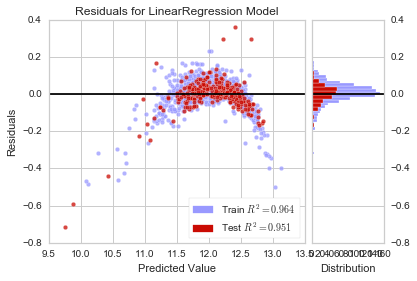

In [49]:
plot_residuals(LinearRegression(), X_train, y_train, X_valid, y_valid)

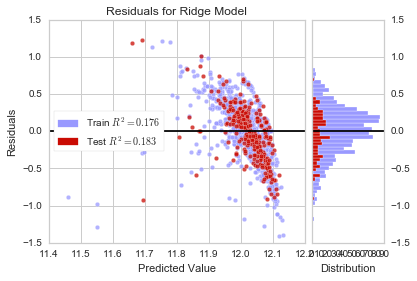

In [50]:
plot_residuals(Ridge(), X_train, y_train, X_valid, y_valid)

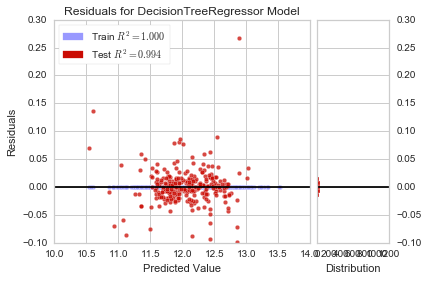

In [51]:
plot_residuals(DecisionTreeRegressor(), X_train, y_train, X_valid, y_valid)

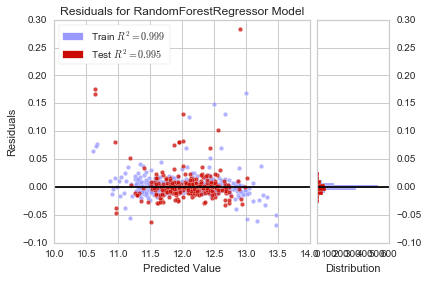

In [52]:
plot_residuals(RandomForestRegressor(n_estimators=1000, criterion='mse'), X_train, y_train, X_valid, y_valid)

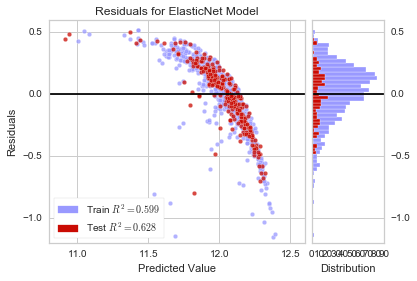

In [53]:
plot_residuals(ENet, X_train, y_train, X_valid, y_valid)

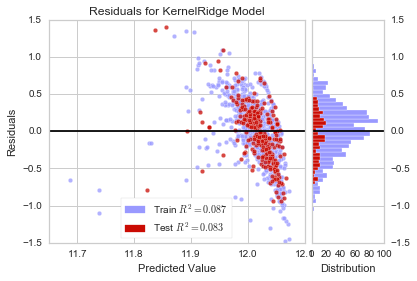

In [54]:
plot_residuals(KRR, X_train, y_train, X_valid, y_valid)

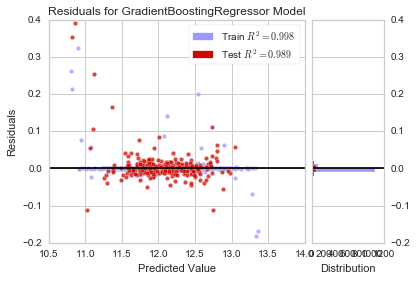

In [55]:
plot_residuals(GBoost, X_train, y_train, X_valid, y_valid)

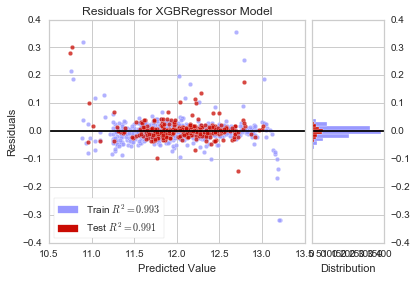

In [56]:
plot_residuals(model_xgb, X_train, y_train, X_valid, y_valid)


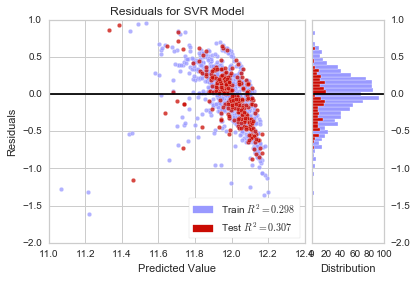

In [57]:
plot_residuals(svr, X_train, y_train, X_valid, y_valid)

In [58]:
random_forest = RandomForestRegressor(n_estimators=1000, criterion='mse')

gboost_ = GBoost

model_xgb_ = model_xgb

In [59]:
ensemble_model = StackingRegressor(regressors=[random_forest,gboost_,model_xgb_], 
                                   meta_regressor=SVR(kernel="rbf"))

ensemble_model.fit(X_train, y_train)

score = np.sqrt(-cross_val_score(ensemble_model, X_valid, y_valid, scoring="neg_mean_squared_error", cv=10)).mean()

print("Stacking Regressor score: {:.4f}\n".format(score))

Stacking Regressor score: 0.0735

